Build a regression model.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm

In [11]:
#loading data 
data = read_csv(r'C:\Users\akobe\OneDrive\Desktop\Lighthouse\Project2\Statistical-Modelling-Project\data\allData.csv')

In [30]:
data.head(1)

,Unnamed: 0,businessName,businessCategory,rating,noOfReviews,distance,latlon,stationName,numberOfBikes
0,0,The Wilson Street Pantry,cafes,4.5,86,48.999836,"55.858167,-4.245483",Merchant Square - ELECTRIC,2


In [32]:
data['numberOfBikes'].max()

24

In [13]:
data.corr()

,Unnamed: 0,rating,noOfReviews,distance,numberOfBikes
Unnamed: 0,1.000000,-0.059156,-0.105755,0.038376,0.090667
rating,-0.059156,1.000000,0.209485,-0.050660,-0.025708
noOfReviews,-0.105755,0.209485,1.000000,-0.009293,-0.243879
distance,0.038376,-0.050660,-0.009293,1.000000,0.101743
numberOfBikes,0.090667,-0.025708,-0.243879,0.101743,1.000000


In [16]:
y = data['numberOfBikes']
x = data[['rating', 'noOfReviews', 'distance']]
x = sm.add_constant(x)
x.head(1)

,const,rating,noOfReviews,distance
0,1.0,4.5,86,48.999836


In [18]:
model = sm.OLS(y,x) #instantiate
results = model.fit()#fit the model 

Provide model output and an interpretation of the results. 

In [19]:
#model results 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          numberOfBikes   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     48.47
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           3.42e-30
Time:                        21:15:03   Log-Likelihood:                -5873.1
No. Observations:                1926   AIC:                         1.175e+04
Df Residuals:                    1922   BIC:                         1.178e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.0234      0.819      6.137      

#### Adjusted R-square = 0.069 > 0.05
p-value for rating > 0.05, therefore should be removed from the model 

In [22]:
X = data[['noOfReviews', 'distance']]
X = sm.add_constant(X)
X.head(1)

,const,noOfReviews,distance
0,1.0,86,48.999836


In [23]:
model = sm.OLS(y,X) #instantiate
results = model.fit()#fit the model 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          numberOfBikes   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     71.67
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           9.50e-31
Time:                        21:25:16   Log-Likelihood:                -5874.0
No. Observations:                1926   AIC:                         1.175e+04
Df Residuals:                    1923   BIC:                         1.177e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.1035      0.285     21.453      

##### p-values are all <0.05 therefore we should keep #of reviews and distance (from station) in the model. Adjusted r-square has changed slightly between the two models. 

Would need to take this information with a grain of salt as there is likely issues with mulitcollinearity as condition # is large 

In [26]:
#residuals 
residuals = results.resid

<AxesSubplot:ylabel='Count'>

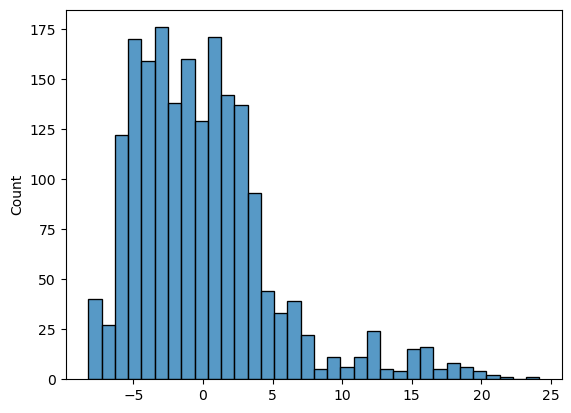

In [27]:
sns.histplot(residuals)

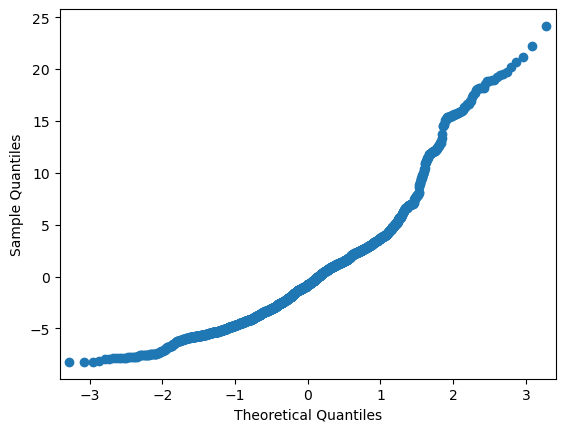

In [28]:
sm.qqplot(residuals)
plt.show()

In [29]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.8987216353416443, pvalue=7.008760170503114e-34)

# Stretch

How can you turn the regression model into a classification model?

#### you could turn it into a claassification model by picking a range for number of bikes. For example: # of bikes ranges from 0-24. One category could be 0-11 bikes the other could be 12-24 bikes. 